Resources : https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
what_we_are_covering = {
    1:'data(prepare and load)',
    2:'build a model',
    3:'fitting the model to data(training)',
    4:'making predictions and evaluating a model(Inference)',
    5:'saving and loading a model',
    6:'puttig it all together'
}
what_we_are_covering

{1: 'data(prepare and load)',
 2: 'build a model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(Inference)',
 5: 'saving and loading a model',
 6: 'puttig it all together'}

In [ ]:
import torch
from torch import nn # nn contains all PyTorch building blocks for neural newtorks
import matplotlib.pyplot as plt

##1. Data (preparing and loading)

Data can be anything..... in machine learing.

- Excel spreadsheet
- Images of any kind
- Videos (YouTube had lot of data)
- Audio like songs and Podcasts
- DNA
- Text

Machine learning is a game of two parts:
1. Get data in numerical represantation
2. Build a model to learn in that numerical represantation.


To showcase, this let's create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with *known* **parameters**

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

In [ ]:
# Create training and testing set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where data explorer's motto comes in!

"Visualize, visualize, visualize"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    # Are there predictions?
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14});

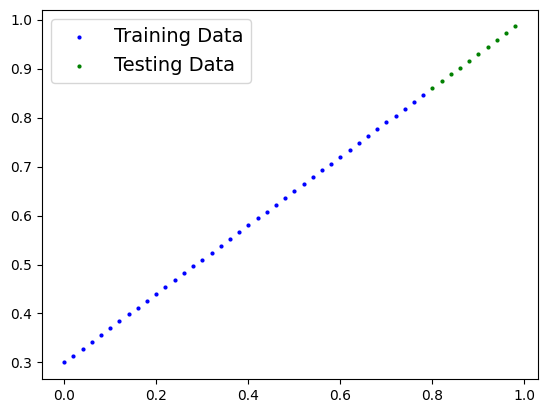

In [ ]:
plot_predictions()

##2. Build model

Our first PyTorch model!

For `OOP` reference : https://realpython.com/python3-object-oriented-programming/

super(): You can access the parent class from inside a method of a child class by using **super()**

what our model does:
- start with random values(weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values(weight and the bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropogation


In [ ]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everythnig in PyTorch inherits from nn.Module ->
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method to define computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

In PyTorch, `nn.Parameter` is a special type of tensor used to define trainable parameters in neural networks. It is primarily used within `torch.nn.Module` to indicate that a tensor is a model parameter that should be automatically registered and considered during optimization (e.g., for gradient computation and updates).

In Python, `subclasses` refer to classes that inherit attributes and methods from a parent class (also known as a superclass or base class).

## PyTorch model buliding essential

- torch.nn - contains all of the buildings blcoks for computational graphs (a neural network can be considered as a computational graph)
- torch.nn.Parameter - what parameteres our model try and learn, often a PyTorch layer from torch.nn will set these for us
- torch.nn.Module - The base class for all neural networks modules, if you `subclasses` it , you should overwrite forward()
- torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
- def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward propogation

### Checking the contents of our PyTorch model

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the Parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
 weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode ()`

To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predictions with model (Predictions == Inference)
with torch.inference_mode(): # inference_mode shuts down the to track the gradient descent because while predicting we don't need to keep gradient descent data Therefore, `torch.inference_mode()` runs faster
    y_preds = model_0(X_test)

# You can also do similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

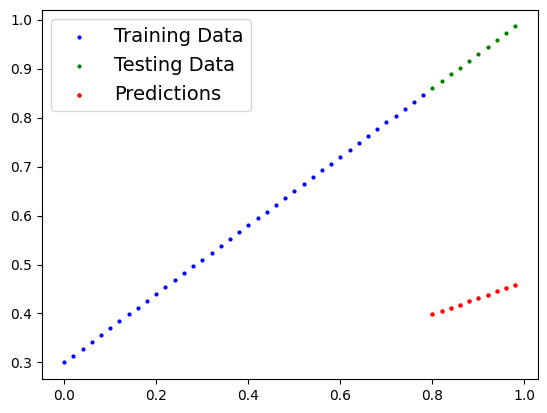

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters(these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better repersenatation of dat.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

- Note: Loss functions may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a Loss function.

-  **Loss function:** Predicted value - actual value (how wrong our model's prediction are to the ideal outputs, lower is better).

- **Optimizers** - Takes into account the loss of a model and adjusts the model's parameters's (weight and bias in our case) to improve the loss function.
    - Inside the optimizer you'll often have to set two parameters:
        - `params` - the model parameters you'd like to optimize or example `params=model_0.parameters()`
        -lr(learning rate) - the learnig rate is a hyperparameter(`A hyperparameter is a setting chosen by a machine learning engineer before training a model, which controls how the model learns or its structure. Examples include learning rate, number of layers, or batch size.`) that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)
- **Gradient Descent** is an algorithm that you can apply to try to minimize the cost function of the models



And specifically for PyTroch, we need:
- A training loop
- A testing loop

#### How *learning rate* effects *coefficients*
1. Let's say we choose a small learning rate like `0.0001`.
2. And our $j(w)$ function graph looks like this:

<img src="https://github.com/Param302/ML-specialization-notes/raw/master/Course%201%20-%20Supervised%20Machine%20Learning/Week%201%20-%20Intro%20to%20ML/images/learning-rate-graph-1.jpg" alt="learning rate graph" width="500px">

3. And we choose the value of `w` parameter on the marker.
4. And we draw the tangent and find it's *slope* and multiply it by *learning rate*.
5. So, lower the learning rate, means taking a very small step.
6. Small steps takes a lot of time, to reach the minimum value of `w`.
7. So, *gradient descent* will work very slow.

<img src="https://github.com/Param302/ML-specialization-notes/raw/master/Course%201%20-%20Supervised%20Machine%20Learning/Week%201%20-%20Intro%20to%20ML/images/learning-rate-graph-2.jpg" alt="learning graph reaching minimum value" width="500px">

Let's see what happens, if we choose a large learning rate like `0.9`.

1. At first our $j(w)$ function graph look like this:

<img src="https://github.com/Param302/ML-specialization-notes/raw/master/Course%201%20-%20Supervised%20Machine%20Learning/Week%201%20-%20Intro%20to%20ML/images/learning-rate-graph-3.jpg" alt="learning rate graph another example" width="500px">

2. And we choose the value of `w` parameter closer to the minimum value.
3. If we draw the tangent and find it's *slope* an multiply it by *learning rate*.
4. We, eventually skips the minimum value and goes far from minimum value of `w`.
5. Because higher *learning rate* lead to take bigger step.
6. And we never reach the minimum value, rather go away from it.

<img src="https://github.com/Param302/ML-specialization-notes/raw/master/Course%201%20-%20Supervised%20Machine%20Learning/Week%201%20-%20Intro%20to%20ML/images/learning-rate-graph-4.jpg" alt="learning rate graph another example" width="500px">

> #### If α is too large...
> Gradient descent may:
> - Overshoot, never reach minimum
> - Fail to converge, diverge    ~ *Andrew Ng*

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters ( a parameter is value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss() # L1 == MAE

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),  # we want to optimize the parameters in our model
                            lr = 0.01) # lr - learning rate

- #### **Stochastic Gradient Descent (SGD)** is an optimization algorithm used to train machine learning models by minimizing a loss function. It updates the model's parameters (e.g., weights) iteratively based on the gradient of the loss with respect to those parameters.

    -   ### **Gradient Descent vs. Stochastic Gradient Descent**

    #### **Gradient Descent**:
    - In **Batch Gradient Descent**, the algorithm computes the gradients of the entire dataset to update the parameters.
    - This ensures an accurate direction for updates but can be computationally expensive, especially for large datasets.

    #### **Stochastic Gradient Descent**:
    - In **SGD**, the parameters are updated for each training example (or for a small random subset of examples).
    - This means SGD performs updates much more frequently than Batch Gradient Descent.


- The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value that decreases as the error approaches zero.
    - # MAE (Mean Absolute Error)

**Mean Absolute Error (MAE)** is a metric used to evaluate the performance of regression models. It measures the average of the absolute differences between the predicted values (\(\hat{y}\)) and the actual values (\(y\)).

### Formula:


$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$



### Bulding a loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass(this involves data moving through our model's `forward()` to make predictions on data - also called as **Forward propogation**
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each  of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step: use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


# Example Walkthrought of the above

### 1. **Defining the Epochs**
```python
epochs = 1
```
- **Explanation:**
  - `epochs` is a hyperparameter that defines how many times the model will loop through the entire training dataset.
  - In this case, it's set to `1`, meaning the training process will only loop through the dataset once.

---

### 2. **Loop Through the Data**
```python
for epoch in range(epochs):
```
- **Explanation:**
  - The loop ensures the model iterates through the dataset for the specified number of epochs.
  - Here, since `epochs = 1`, the loop will run once.

---

### 3. **Set the Model to Training Mode**
```python
model_0.train()
```
- **Explanation:**
  - The `.train()` method sets the model to training mode.
  - It ensures that certain layers (e.g., dropout, batch normalization) behave correctly during training (e.g., dropout randomly disables some neurons).

---

### 4. **Forward Pass**
```python
y_pred = model_0(X_train)
```
- **Explanation:**
  - The input data `X_train` is passed through the model `model_0` to compute predictions `y_pred`.
  - This is called the **forward pass** where the model processes the data.

---

### 5. **Calculate the Loss**
```python
loss = loss_fn(y_pred, y_train)
```
- **Explanation:**
  - The **loss function** (`loss_fn`) compares the model's predictions (`y_pred`) with the actual target values (`y_train`).
  - The result is the **loss**, a measure of how well the model's predictions match the true labels.

---

### 6. **Zero the Gradients**
```python
optimizer.zero_grad()
```
- **Explanation:**
  - Gradients from the previous step are stored in the optimizer. To prevent accumulation, `optimizer.zero_grad()` clears these gradients before calculating new ones.

---

### 7. **Backpropagation**
```python
loss.backward()
```
- **Explanation:**
  - **Backpropagation** computes the gradients of the loss with respect to the model's parameters (weights and biases) using the chain rule.
  - These gradients will be used to update the model's parameters.

---

### 8. **Update Model Parameters (Optimizer Step)**
```python
optimizer.step()
```
- **Explanation:**
  - The **optimizer** updates the model's parameters (e.g., weights) based on the computed gradients and the learning rate.
  - This step performs **gradient descent**, adjusting the parameters to reduce the loss.



If encounter doubt search in chatgpt for Numerical example for this


In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter beacuse we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

###Training
# 0.Loop through the data
for epoch in range(epochs):
    # Set the model to the training mode
    model_0.train() # train mode in PyTorch sets all the parameters that require gradients to require gradients (The .train() method sets the model to training mode.)

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train) # (predicted value, actual value)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to te parameters of the model
    loss.backward()

    # Step the optimizer (perform gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval() # turns off differnet settings in the model not needed for evaluation/testing(dropout/ batch norm layers)
    with torch.inference_mode():  # turns off gradient tracking and couple of more things behind the scene

        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print the model state_dict
        print(f"{model_0.state_dict()}\n")



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])

Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])

Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])

Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])

Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])

Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values)), test_loss_values # loss_values were in tensor so converted in numpy(matpltlib only works with numpy)

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

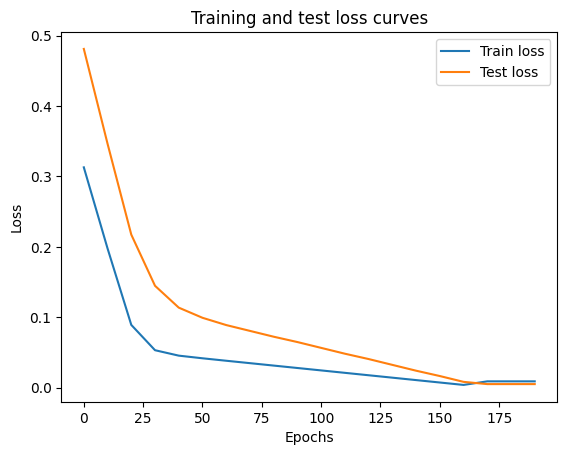

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

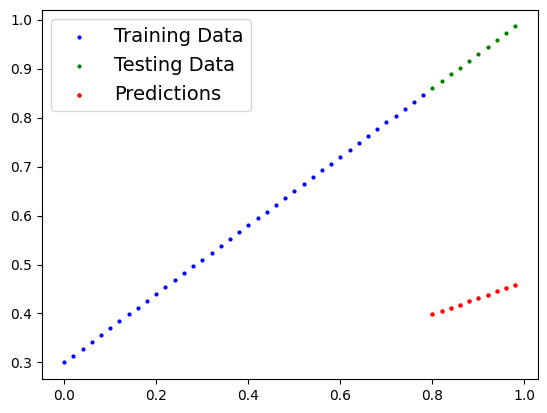

In [ ]:
plot_predictions(predictions=y_preds) # previous predictions

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Ideal Parameters
weight, bias

(0.7, 0.3)

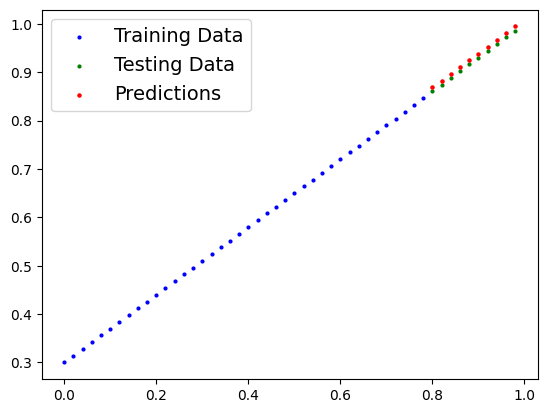

In [ ]:
plot_predictions(predictions=y_preds_new) # new predictions

## Saving a model in PyTorch

There are three main methods you should know about saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load model's saved state dictionary

Pytorch save and load - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"  # A common PyTorch convention is to save models using either a .pt or .pth file extension.
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models # (`!` is used to run shell commands within te notebook)

total 4
-rw-r--r-- 1 root root 1680 Jan  8 10:58 01_pytorch_workflow_model_0.pth


##Loading a PyTorch Model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-28-ff644bff1a49>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare the Original model (model_0) and Loaded model (loaded_model_0)
loaded_model_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Putting it all together

Let's go back through the steps above and see it in palce

In [ ]:
# Import PyTorch and matplotlib

Create device agnostic code

This means if we've got access to GPU, our code will use it (for potentially faster Computing)

If no GPU is available, the code will default to using CPU

In [ ]:
# Setup the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda
